In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib 

# 간단한 시계열 데이터 만들기

* 정상시계열(우연 변동 시계열)

In [2]:
dd= np.array([1342,1442,1252,1343,1425,1362,1256,1272,1243,1359,1412,1253,1201,1478,1322,1406,1254,1289,1497,1208]).reshape(5,4)

In [3]:
dd

array([[1342, 1442, 1252, 1343],
       [1425, 1362, 1256, 1272],
       [1243, 1359, 1412, 1253],
       [1201, 1478, 1322, 1406],
       [1254, 1289, 1497, 1208]])

In [4]:
dd_ts = pd.DataFrame(dd, index= range(2016,2021), columns=['Qt1','Qt2','Qt3','Qt4'])

데이터프레임 dd_ts의 행과 열을 스택 방식으로 변환하고 인덱스 초기화

In [5]:
dd_ts.stack()

2016  Qt1    1342
      Qt2    1442
      Qt3    1252
      Qt4    1343
2017  Qt1    1425
      Qt2    1362
      Qt3    1256
      Qt4    1272
2018  Qt1    1243
      Qt2    1359
      Qt3    1412
      Qt4    1253
2019  Qt1    1201
      Qt2    1478
      Qt3    1322
      Qt4    1406
2020  Qt1    1254
      Qt2    1289
      Qt3    1497
      Qt4    1208
dtype: int32

In [6]:
dd_ts=dd_ts.stack().reset_index()
dd_ts

,level_0,level_1,0
0,2016,Qt1,1342
1,2016,Qt2,1442
2,2016,Qt3,1252
3,2016,Qt4,1343
4,2017,Qt1,1425
5,2017,Qt2,1362
6,2017,Qt3,1256
7,2017,Qt4,1272
8,2018,Qt1,1243
9,2018,Qt2,1359


In [7]:
dd_ts.columns = ['year','quarter','value']
dd_ts

,year,quarter,value
0,2016,Qt1,1342
1,2016,Qt2,1442
2,2016,Qt3,1252
3,2016,Qt4,1343
4,2017,Qt1,1425
5,2017,Qt2,1362
6,2017,Qt3,1256
7,2017,Qt4,1272
8,2018,Qt1,1243
9,2018,Qt2,1359


In [8]:
dd_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     20 non-null     int64 
 1   quarter  20 non-null     object
 2   value    20 non-null     int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 528.0+ bytes


In [9]:
dd_ts['year'] = dd_ts['year'].apply(str)
dd_ts['year'].dtype

dtype('O')

In [10]:
dd_ts['date']=dd_ts['year']+dd_ts['quarter']

In [11]:
dd_ts['date']=dd_ts['date'].str.replace("t","")
dd_ts['date']

0     2016Q1
1     2016Q2
2     2016Q3
3     2016Q4
4     2017Q1
5     2017Q2
6     2017Q3
7     2017Q4
8     2018Q1
9     2018Q2
10    2018Q3
11    2018Q4
12    2019Q1
13    2019Q2
14    2019Q3
15    2019Q4
16    2020Q1
17    2020Q2
18    2020Q3
19    2020Q4
Name: date, dtype: object

date컬럼을 분기 (quarter)주기로 변환 후 타임스탬프 형식으로 변경

In [12]:
pd.PeriodIndex(dd_ts['date'], freq='Q').to_timestamp()
dd_ts

,year,quarter,value,date
0,2016,Qt1,1342,2016Q1
1,2016,Qt2,1442,2016Q2
2,2016,Qt3,1252,2016Q3
3,2016,Qt4,1343,2016Q4
4,2017,Qt1,1425,2017Q1
5,2017,Qt2,1362,2017Q2
6,2017,Qt3,1256,2017Q3
7,2017,Qt4,1272,2017Q4
8,2018,Qt1,1243,2018Q1
9,2018,Qt2,1359,2018Q2


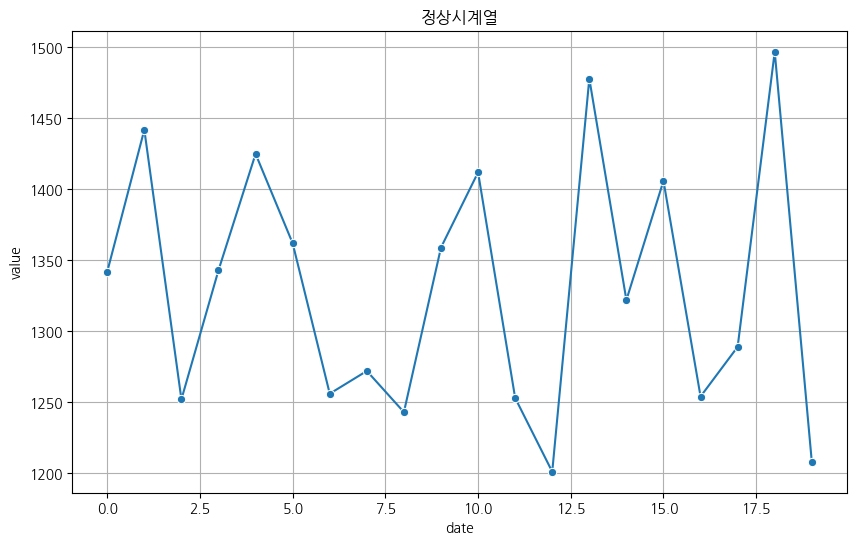

In [13]:
#시계열 데이터 시각화
plt.figure(figsize=(10,6))
sns.lineplot(x=dd_ts.index, y=dd_ts['value'], marker='o')
plt.title("정상시계열")
plt.xlabel("date")
plt.ylabel("value")
plt.grid(True)
plt.show()

주기를 타지 않는 제품의 생산량, 판매량 데이터, 짧은 기간의 주가 데이터, 금리 등이 위와 같은 성향을 갖는다.

# 계절 변동 시계열 (seasonality)

In [14]:
season1 = np.array((1142, 1242, 1452, 1543,
                   1125,1262,1456,1572,
                   1143,1269,1462,1553,
                   1121,1258,1472,1546,
                   1154,1249,1477,1548)).reshape(5,4)

season1_ts= pd.DataFrame(season1, index= range(2016,2021), columns=['Qtr1','Qtr2','Qtr3','Qtr4'])
season1_ts

,Qtr1,Qtr2,Qtr3,Qtr4
2016,1142,1242,1452,1543
2017,1125,1262,1456,1572
2018,1143,1269,1462,1553
2019,1121,1258,1472,1546
2020,1154,1249,1477,1548


In [15]:
season1_ts =season1_ts.stack().reset_index()
season1_ts

,level_0,level_1,0
0,2016,Qtr1,1142
1,2016,Qtr2,1242
2,2016,Qtr3,1452
3,2016,Qtr4,1543
4,2017,Qtr1,1125
5,2017,Qtr2,1262
6,2017,Qtr3,1456
7,2017,Qtr4,1572
8,2018,Qtr1,1143
9,2018,Qtr2,1269


In [16]:
season1_ts.columns = ['year','quarter','value']
season1_ts

,year,quarter,value
0,2016,Qtr1,1142
1,2016,Qtr2,1242
2,2016,Qtr3,1452
3,2016,Qtr4,1543
4,2017,Qtr1,1125
5,2017,Qtr2,1262
6,2017,Qtr3,1456
7,2017,Qtr4,1572
8,2018,Qtr1,1143
9,2018,Qtr2,1269


In [17]:
season1_ts['year'] = season1_ts['year'].apply(str)
season1_ts['year'].dtype

dtype('O')

In [18]:
season1_ts['date']=season1_ts['year']+season1_ts['quarter']

In [19]:
season1_ts['date']=season1_ts['date'].str.replace("t","")
season1_ts['date']

0     2016Qr1
1     2016Qr2
2     2016Qr3
3     2016Qr4
4     2017Qr1
5     2017Qr2
6     2017Qr3
7     2017Qr4
8     2018Qr1
9     2018Qr2
10    2018Qr3
11    2018Qr4
12    2019Qr1
13    2019Qr2
14    2019Qr3
15    2019Qr4
16    2020Qr1
17    2020Qr2
18    2020Qr3
19    2020Qr4
Name: date, dtype: object

In [20]:
season1_ts=season1_ts.set_index('date')

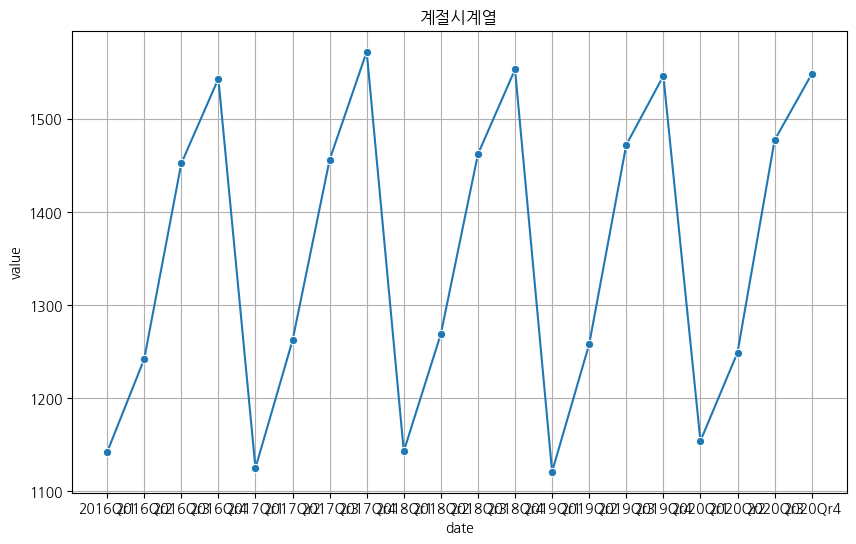

In [21]:
#시계열 데이터 시각화
plt.figure(figsize=(10,6))
sns.lineplot(x=season1_ts.index, y=season1_ts['value'], marker='o')
plt.title("계절시계열")
plt.xlabel("date")
plt.ylabel("value")
plt.grid(True)
plt.show()

# 추세변동 시계열

In [22]:
trend = np.array((1142, 1242, 1252, 1343,
                    1225, 1562, 1356, 1572,
                    1343, 1459, 1412, 1453,
                    1401, 1478, 1322, 1606,
                    1554, 1589, 1597, 1408) ).reshape(5,4)
trend_ts = pd.DataFrame(trend, index=range(2016, 2021), columns=['Qtr1', 'Qtr2','Qtr3','Qtr4'])
trend_ts = trend_ts.stack().reset_index()
display(trend_ts)

,level_0,level_1,0
0,2016,Qtr1,1142
1,2016,Qtr2,1242
2,2016,Qtr3,1252
3,2016,Qtr4,1343
4,2017,Qtr1,1225
5,2017,Qtr2,1562
6,2017,Qtr3,1356
7,2017,Qtr4,1572
8,2018,Qtr1,1343
9,2018,Qtr2,1459


In [23]:
trend_ts.columns = ['year','quarter','value']
trend_ts

,year,quarter,value
0,2016,Qtr1,1142
1,2016,Qtr2,1242
2,2016,Qtr3,1252
3,2016,Qtr4,1343
4,2017,Qtr1,1225
5,2017,Qtr2,1562
6,2017,Qtr3,1356
7,2017,Qtr4,1572
8,2018,Qtr1,1343
9,2018,Qtr2,1459


In [24]:
trend_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     20 non-null     int64 
 1   quarter  20 non-null     object
 2   value    20 non-null     int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 528.0+ bytes


In [25]:
trend_ts['year'] =trend_ts['year'].apply(str)
trend_ts['year'].dtype

dtype('O')

In [26]:
trend_ts['date']=trend_ts['year']+trend_ts['quarter']

In [27]:
trend_ts['date']=trend_ts['date'].str.replace("t","")
trend_ts['date']

0     2016Qr1
1     2016Qr2
2     2016Qr3
3     2016Qr4
4     2017Qr1
5     2017Qr2
6     2017Qr3
7     2017Qr4
8     2018Qr1
9     2018Qr2
10    2018Qr3
11    2018Qr4
12    2019Qr1
13    2019Qr2
14    2019Qr3
15    2019Qr4
16    2020Qr1
17    2020Qr2
18    2020Qr3
19    2020Qr4
Name: date, dtype: object

date컬럼을 분기 (quarter)주기로 변환 후 타임스탬프 형식으로 변경

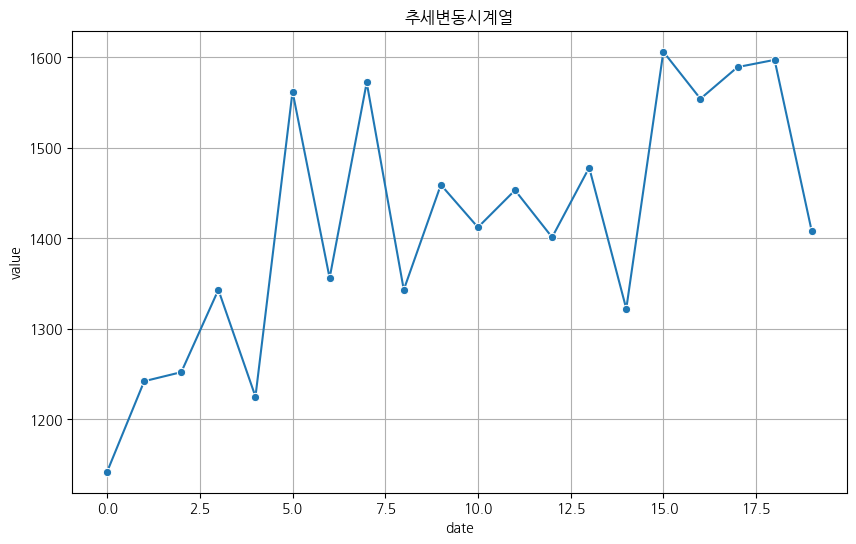

In [28]:
#시계열 데이터 시각화
plt.figure(figsize=(10,6))
sns.lineplot(x=trend_ts.index, y=trend_ts['value'], marker='o')
plt.title("추세변동시계열")
plt.xlabel("date")
plt.ylabel("value")
plt.grid(True)
plt.show()

예시: 물가 데이터, 희소 원자재 가격 데이터, 대부분의 주가지수 데이터

# 계절적 추세변동 시계열 데이터

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
#계절적 추세변동 시계열 데이터 생성
st1 = np.array([1142, 1242, 1452, 1543,
                1225, 1362, 1556, 1672,
                1343, 1459, 1662, 1753,
                1421, 1558, 1772, 1846,
                1554, 1649, 1877, 1948])
#시계열 데이터의 인덱스를 2016년 1분기부터 시작해 분기별로 생성
index = pd.date_range(start='2016Q1', periods=len(st1), freq='QE')
st1_ts = pd.Series(st1, index=index)

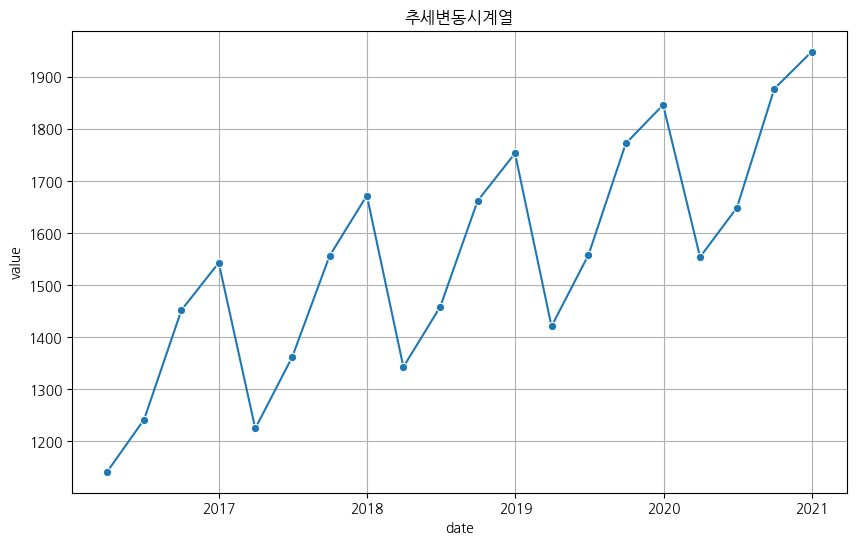

In [31]:
#시계열 데이터 시각화
plt.figure(figsize=(10,6))
sns.lineplot(x=st1_ts.index, y=st1_ts.values, marker='o')
plt.title("추세변동시계열")
plt.xlabel("date")
plt.ylabel("value")
plt.grid(True)
plt.show()

# 여러가지 시계열 데이터 모아 보기

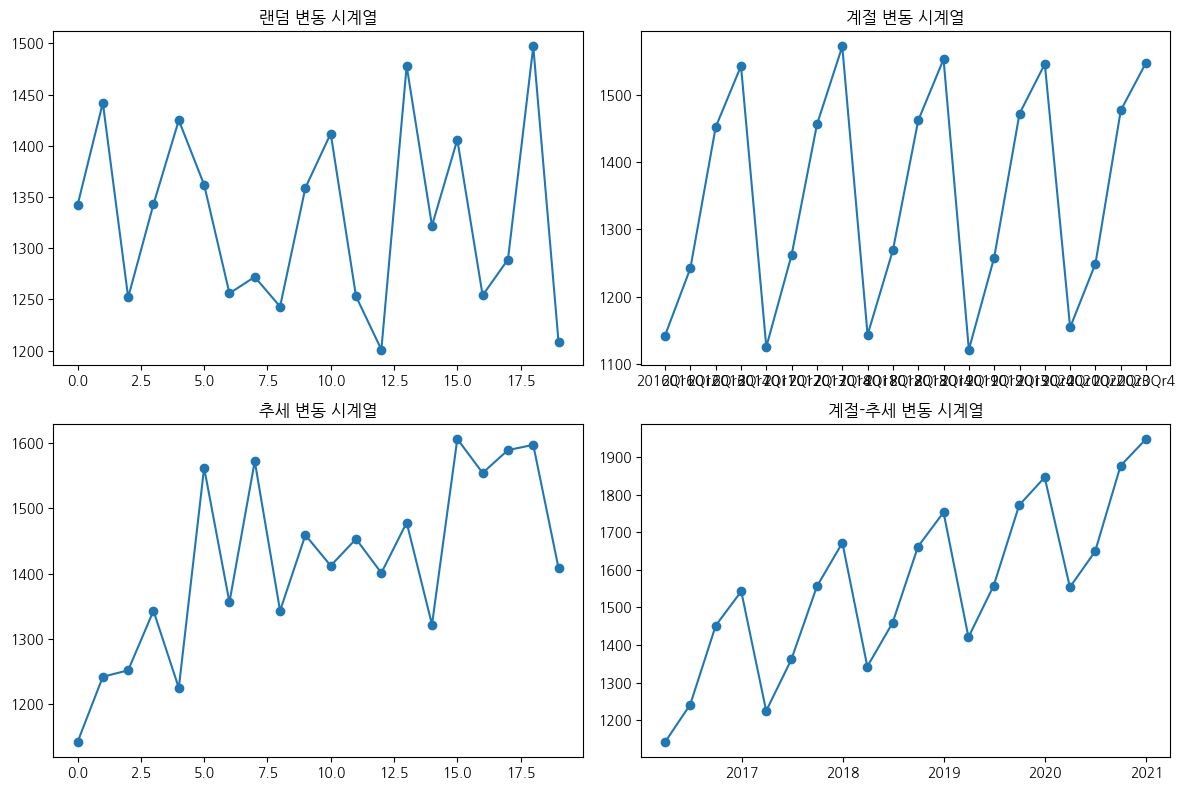

In [32]:
fig, axs = plt.subplots(2,2, figsize=(12,8))

# 랜덤 변동 시계열
axs[0,0].plot(dd_ts.index, dd_ts['value'], marker = 'o')
axs[0,0].set_title("랜덤 변동 시계열")

# 계절 변동 시계열
axs[0,1].plot(season1_ts.index, season1_ts['value'], marker = 'o')
axs[0,1].set_title("계절 변동 시계열")

# 추세 변동 시계열
axs[1,0].plot(trend_ts.index, trend_ts['value'], marker = 'o')
axs[1,0].set_title("추세 변동 시계열")

# 계절-추세 변동 시계열
axs[1,1].plot(st1_ts.index, st1_ts.values, marker = 'o')
axs[1,1].set_title("계절-추세 변동 시계열")


plt.tight_layout()
plt.show()

# air passenger 데이터로 

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.datasets import get_rdataset

In [34]:
# air passenger 데이터로드
airpass_data = get_rdataset('AirPassengers', package='datasets')

In [35]:
airpass_data.values

<function Dataset.values>

In [36]:
airpass_data.data

,time,value
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
...,...,...
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390


In [37]:
airpass_ts = pd.Series(airpass_data.data['value'].values,
                      index = pd.date_range(start='1949-01', periods=len(airpass_data.data), freq='ME'))
airpass_ts

1949-01-31    112
1949-02-28    118
1949-03-31    132
1949-04-30    129
1949-05-31    121
             ... 
1960-08-31    606
1960-09-30    508
1960-10-31    461
1960-11-30    390
1960-12-31    432
Freq: ME, Length: 144, dtype: int64

In [38]:
# 날짜를 맞춰줘야되는게 있기에 잘 다루어 줘야한다.
#판다스에 많은 옵션이 있다
#Changed the `freq` (frequency) to ``'ME'`` (month end frequency).

air passenger데이터 그래프 그리기

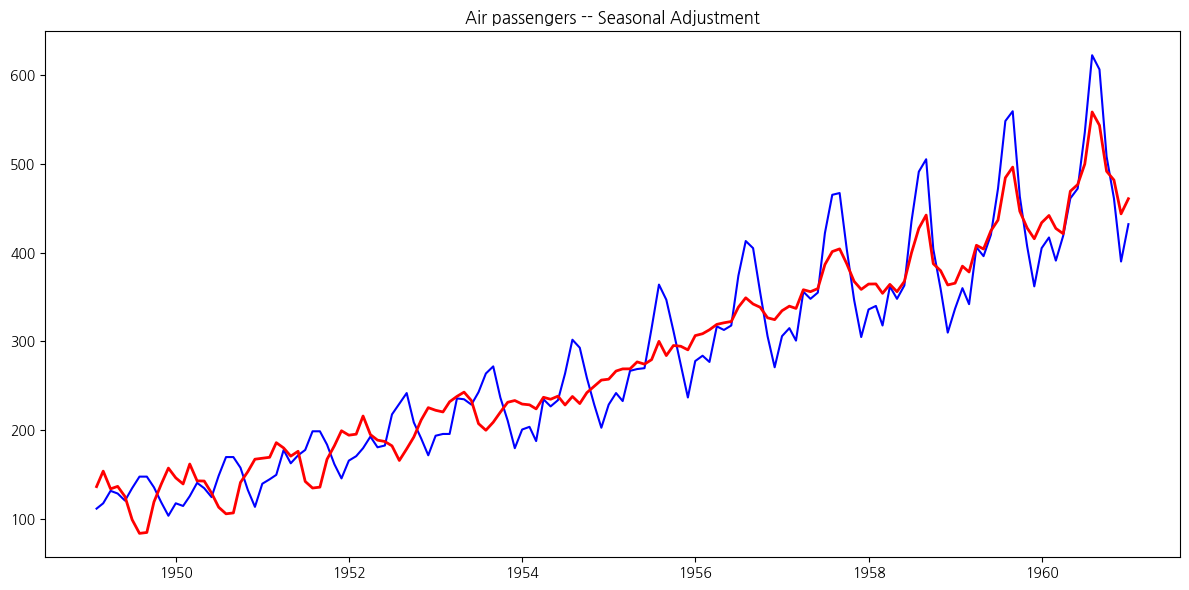

In [39]:
plt.figure(figsize=(12,6))
plt.plot(airpass_ts, label="Air passengers", color='blue')
result_airpass= seasonal_decompose(airpass_ts, model='addictive')
seasonal_adjusted_airpass = airpass_ts - result_airpass.seasonal
plt.plot(seasonal_adjusted_airpass, label='Seasonally Adjusted', color='red', linewidth=2)
plt.title("Air passengers -- Seasonal Adjustment")

plt.tight_layout()
plt.show()

# 차분(Difference): diff
* 현재 값에서 과거값ㅇㄹ 빼주는 것

In [41]:
#Create the DataFrame (assuming 'Date' is the index)
data = {
    'Year': [2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2018, 2018, 2018, 2018, 2019, 2019, 2019, 2019, 2020, 2020, 2020, 2020],
    'Quarter': ['Qtr1', 'Qtr2', 'Qtr3', 'Qtr4', 'Qtr1', 'Qtr2', 'Qtr3', 'Qtr4', 'Qtr1', 'Qtr2', 'Qtr3', 'Qtr4', 'Qtr1', 'Qtr2', 'Qtr3', 'Qtr4', 'Qtr1', 'Qtr2', 'Qtr3', 'Qtr4'],
    'Value': [1342, 1442, 1252, 1343, 1425, 1362, 1256, 1272, 1243, 1359, 1412, 1253, 1201, 1478, 1322, 1406, 1254, 1289, 1497, 1208]
}
index = pd.date_range(start='2016-01-01', periods=len(data['Year']), freq='QE')
dd_ts = pd.DataFrame(data, index=index)

dd_ts

,Year,Quarter,Value
2016-03-31,2016,Qtr1,1342
2016-06-30,2016,Qtr2,1442
2016-09-30,2016,Qtr3,1252
2016-12-31,2016,Qtr4,1343
2017-03-31,2017,Qtr1,1425
2017-06-30,2017,Qtr2,1362
2017-09-30,2017,Qtr3,1256
2017-12-31,2017,Qtr4,1272
2018-03-31,2018,Qtr1,1243
2018-06-30,2018,Qtr2,1359


1차 차분

In [42]:
dd_ts['value_diff']=dd_ts['Value'].diff()
dd_ts

,Year,Quarter,Value,value_diff
2016-03-31,2016,Qtr1,1342,NaN
2016-06-30,2016,Qtr2,1442,100.0
2016-09-30,2016,Qtr3,1252,-190.0
2016-12-31,2016,Qtr4,1343,91.0
2017-03-31,2017,Qtr1,1425,82.0
2017-06-30,2017,Qtr2,1362,-63.0
2017-09-30,2017,Qtr3,1256,-106.0
2017-12-31,2017,Qtr4,1272,16.0
2018-03-31,2018,Qtr1,1243,-29.0
2018-06-30,2018,Qtr2,1359,116.0


2차 차분

In [43]:
dd_ts['value_diff2']=dd_ts['Value'].diff(2)
dd_ts

,Year,Quarter,Value,value_diff,value_diff2
2016-03-31,2016,Qtr1,1342,NaN,NaN
2016-06-30,2016,Qtr2,1442,100.0,NaN
2016-09-30,2016,Qtr3,1252,-190.0,-90.0
2016-12-31,2016,Qtr4,1343,91.0,-99.0
2017-03-31,2017,Qtr1,1425,82.0,173.0
2017-06-30,2017,Qtr2,1362,-63.0,19.0
2017-09-30,2017,Qtr3,1256,-106.0,-169.0
2017-12-31,2017,Qtr4,1272,16.0,-90.0
2018-03-31,2018,Qtr1,1243,-29.0,-13.0
2018-06-30,2018,Qtr2,1359,116.0,87.0


In [44]:
dd_ts['value_diff3']=dd_ts['Value'].diff(3)
dd_ts

,Year,Quarter,Value,value_diff,value_diff2,value_diff3
2016-03-31,2016,Qtr1,1342,NaN,NaN,NaN
2016-06-30,2016,Qtr2,1442,100.0,NaN,NaN
2016-09-30,2016,Qtr3,1252,-190.0,-90.0,NaN
2016-12-31,2016,Qtr4,1343,91.0,-99.0,1.0
2017-03-31,2017,Qtr1,1425,82.0,173.0,-17.0
2017-06-30,2017,Qtr2,1362,-63.0,19.0,110.0
2017-09-30,2017,Qtr3,1256,-106.0,-169.0,-87.0
2017-12-31,2017,Qtr4,1272,16.0,-90.0,-153.0
2018-03-31,2018,Qtr1,1243,-29.0,-13.0,-119.0
2018-06-30,2018,Qtr2,1359,116.0,87.0,103.0


In [45]:
#분기 나타내는 법
dd_ts['cycle'] = dd_ts.index.quarter
dd_ts

,Year,Quarter,Value,value_diff,value_diff2,value_diff3,cycle
2016-03-31,2016,Qtr1,1342,NaN,NaN,NaN,1
2016-06-30,2016,Qtr2,1442,100.0,NaN,NaN,2
2016-09-30,2016,Qtr3,1252,-190.0,-90.0,NaN,3
2016-12-31,2016,Qtr4,1343,91.0,-99.0,1.0,4
2017-03-31,2017,Qtr1,1425,82.0,173.0,-17.0,1
2017-06-30,2017,Qtr2,1362,-63.0,19.0,110.0,2
2017-09-30,2017,Qtr3,1256,-106.0,-169.0,-87.0,3
2017-12-31,2017,Qtr4,1272,16.0,-90.0,-153.0,4
2018-03-31,2018,Qtr1,1243,-29.0,-13.0,-119.0,1
2018-06-30,2018,Qtr2,1359,116.0,87.0,103.0,2


# shift 이전 시점으로 이동

# 시계열의 합집합 교집합
* 2개의 시계열 데이터가 있을 때 1개로 합치는 것
* 합집합 데이터 1, 데이터 2에 있는 모든 자료를 유지하면서 합침
* 교집합 데이터 1과 2에 모두 있는 데이터를 합침

In [49]:
data1= np.arange(1,25).reshape(8,3)
dates1 = pd.date_range(start='2019Q1', period=8, freq='QE')
prod1= pd.DataFrame(data1,indeax=dates1, columns=['web','app','hyb'])
prod1

TypeError: DatetimeArray._generate_range() got an unexpected keyword argument 'period'

In [50]:
data2= np.arange(11,23).reshape(4,3)
dates2 = pd.date_range(start='2020Q1', period=8, freq='QE')
prod2= pd.DataFrame(data1,indeax=dates1, columns=['web','app','hyb'])
prod2

TypeError: DatetimeArray._generate_range() got an unexpected keyword argument 'period'

# 시계열 자료의 부분 추출 및 수정 : window

In [ ]:
# 특정구간 2019 3분기만 추출
prod1_window =prod1.loc['2019Q3':'2019Q3']
prod1_window

# resample 함수 : 시계열 데이터를 새로운 빈도로 재구성하는 함수
* YE: 연말 Year
* M: 